#1 filtering
technique for modifing and enchancing an image
- mathematical function applied to images, in essence
- can be used to emphasize or remove certain features, like edges
- Smoothing, sharpening, edge detection
in this course, we will cover smoothing and edge detection

egde : a technique used to find bundaries of objects in images
as well as segment and extracat information like how many coins in an image.

A common edge detection algo is Sobel


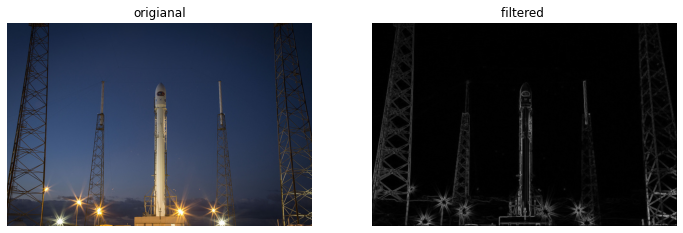

In [16]:
from skimage.filters import sobel
from skimage import data, color
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

rocket = data.rocket()
#we need to grayscale the image first
gray_rocket = rgb2gray(rocket)
#apply edge detection filter
edge_sobel = sobel(gray_rocket)

#show original and resulting

def plot_comparison(original, filteredImage, title_filtered):
  fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 10), sharex=True, sharey=True)
  ax1.set_title("origianal")
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.axis("off")
  ax2.imshow(filteredImage, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis("off")
  
plot_comparison(rocket, edge_sobel, "filtered ")

#Smooting
- achieve using gaussian filter
- used to blur an image or to reduce noise
- blur edges and reduce contrast
- used in other techniques like anti-aliasing filtering

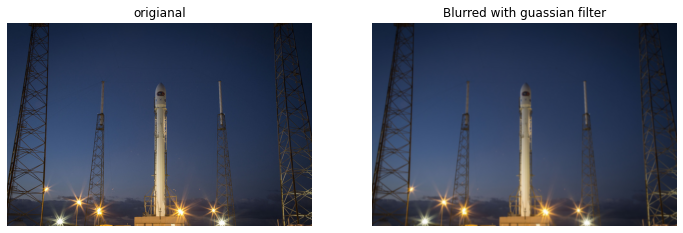

In [11]:
from skimage.filters import gaussian

#apply edge detection filter
guassian_image = gaussian(rocket, multichannel=True)
plot_comparison(rocket, guassian_image, "Blurred with guassian filter")

sometimes when the image is too large,
meaning it has a big resolution, we don't easily see the effect
we have to look more closely at the image

exersises
In this exercise, you'll detect edges in an image by applying the Sobel filter.

Soap pills of heart and rectangle shapes in blue background
Image preloaded as soaps_image.
Theshow_image() function has been already loaded for you.

Let's see if it spots all the figures in the image.

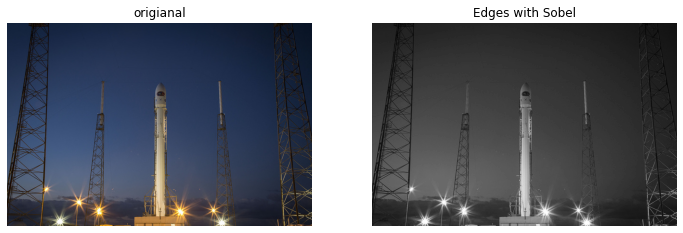

In [30]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
rocket_gray = color.rgb2gray(rocket)

# Apply edge detection filter
edge_sobel = sobel(rocket_gray)

# Show original and resulting image to compare
#show_image(soaps_image, "Original")
#show_image(edge_sobel, "Edges with Sobel")
plot_comparison(rocket, rocket_gray, "Edges with Sobel")

Blurring to reduce noise

In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.

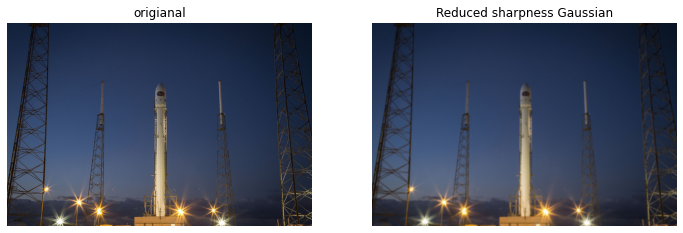

In [29]:
# Import Gaussian filter 
from skimage.filters import gaussian


# Apply filter
gaussian_image = gaussian(rocket, multichannel=True)

# Show original and resulting image to compare
#show_image(building_image, "Original")
#show_image(gaussian_image, "Reduced sharpness Gaussian")
plot_comparison(rocket, gaussian_image, "Reduced sharpness Gaussian")

#Contrast enhancement
often medical images like x-ray can have low contrast,
making it hard to spot important details
then when we improve the contrast, the details become more visible
the contrast of image can be seen as the meassure of its dynamic range, or the "spread of its histogram"

Contrast is the difference between maximum and minimum pixel intensity in the image, can be seen in a histogram

for example if maxiPixels = 255 and miniPixels = 0
then contrast = maxiPixels - miniPixels = 255 -> high contrast

while an image with a low contrast has small difference between its dark and light pixel values

techniques are:

- contrast strething
- histogram equalization (hist equalization, adaptive hist equalization, contrast limited adaptive histogram equalization CLAHE)

hist equalization spreads out the most frequently intensity values

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


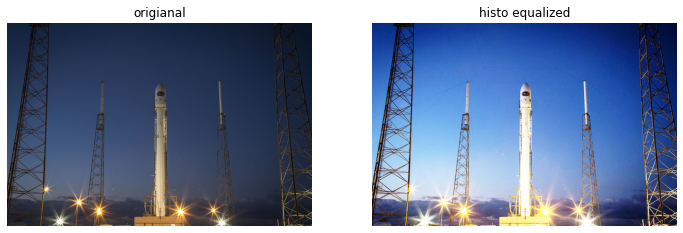

In [19]:
from skimage import exposure

#obtain equalized image
# apply normal hist equalization
image_eq = exposure.equalize_hist(rocket)
#show original and result
plot_comparison(rocket, image_eq,"histo equalized") #we can see more contrast
#show_image(image_eq, "histo equalized")

using adaptive histo
this method computes several histo,
each corresponding to a distinct part of the image,
and use them to redistribute the lightness values of the image histo : CLAHE, develop to prevent over-amplification of noise that adaptive histo equalization can give rise to.
CLAHE makes the image look more natural, this is because it is not taking the global histogram of the entire image, but operates on small regions called tiles or neighborhoods

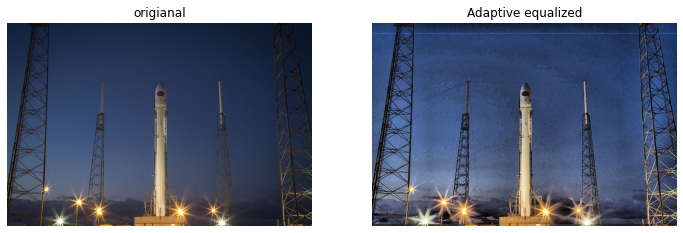

In [21]:
from skimage import exposure
image= rocket

image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

plot_comparison(image, image_adapteq, "Adaptive equalized") #did you see ? its look more natural
# more small objects can be detected

#Exersise1
Just as we saw previously, you can calculate the contrast by calculating the range of the pixel intensities i.e. by subtracting the minimum pixel intensity value from the histogram to the maximum one.

You can obtain the maximum pixel intensity of the image by using the np.max() method from NumPy and the minimum with np.min() in the console.

The image has already been loaded as clock_image, NumPy as np and the show_image() function.

In [32]:
import numpy as np

def contrast(image):
  return np.max(image) - np.min(image)
contrast(rocket) # 255 means this image has a high resolution


255

#Exersise2
Medical images
You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset 
First, you'll check the histogram of the image and then apply standard histogram equalization to improve the contrast. Remember we obtain the histogram by using the hist() function from Matplotlib, which has been already imported as plt.


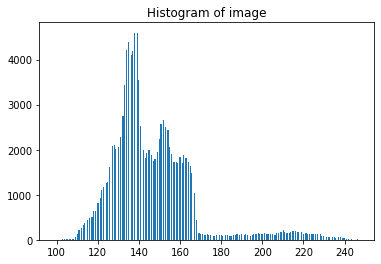

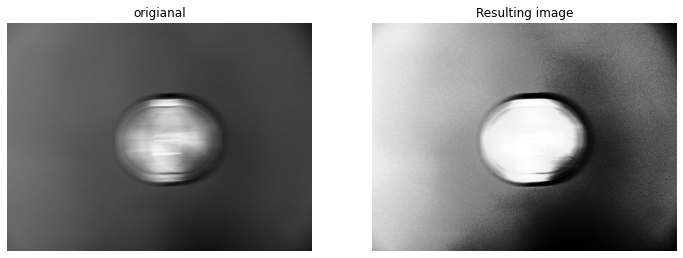

In [39]:
# Import the required module
from skimage import exposure
image = data.clock()
# Show original x-ray image and its histogram
#show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image)

# Show the resulting image
#show_image(xray_image_eq, 'Resulting image')
plot_comparison(image, image_eq, 'Resulting image')

#Ex 3
Aerial image

In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

For this we will use the normal or standard technique of Histogram Equalization.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The rough_wall dataset has been removed due to licensing concerns.It has been replaced with the gravel dataset. This warning messagewill be replaced with an error in scikit-image 0.17.
  after removing the cwd from sys.path.


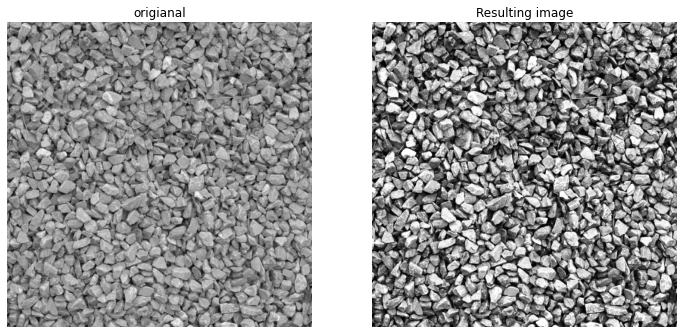

In [35]:
# Import the required module
from skimage import exposure

image = data.rough_wall()
# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image)

# Show the original and resulting image
#show_image(image_aerial, 'Original')
#show_image(image_eq, 'Resulting image')
plot_comparison(image, image_eq, 'Resulting image')

#ex4

Let's add some impact and contrast

Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, you'll increase the contrast of a cup of coffee. Something you could share with your friends on social media. Don't forget to use #ImageProcessingDatacamp as hashtag!

Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.

A function called show_image(), that displays an image using Matplotlib, has already been defined. It has the arguments image and title, with title being 'Original' by default.

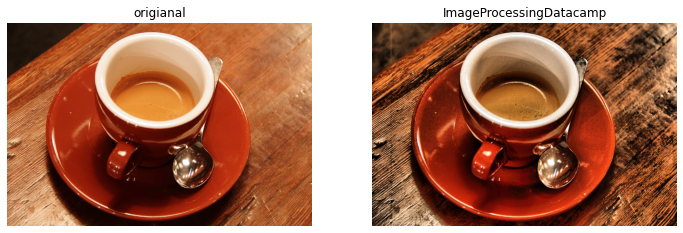

In [33]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=.03)

# Compare the original image to the equalized
#show_image(original_image)
#show_image(adapthist_eq_image, '#ImageProcessingDatacamp')
plot_comparison(original_image, adapthist_eq_image, 'ImageProcessingDatacamp')